Cross-validated R^2 Score: 0.998118637133963
Mean Squared Error: 7398723.948826447
R^2 Score: 0.9992129017075717
Model Coefficients:  [ 1.24377959e+05 -8.58522739e+02  2.94119025e+03 -1.64225225e+02
  9.12136354e+03 -2.24836793e+02 -5.18873317e+03 -1.37907732e+03
  1.04185770e+02]
Model Intercept:  437849.47705768683


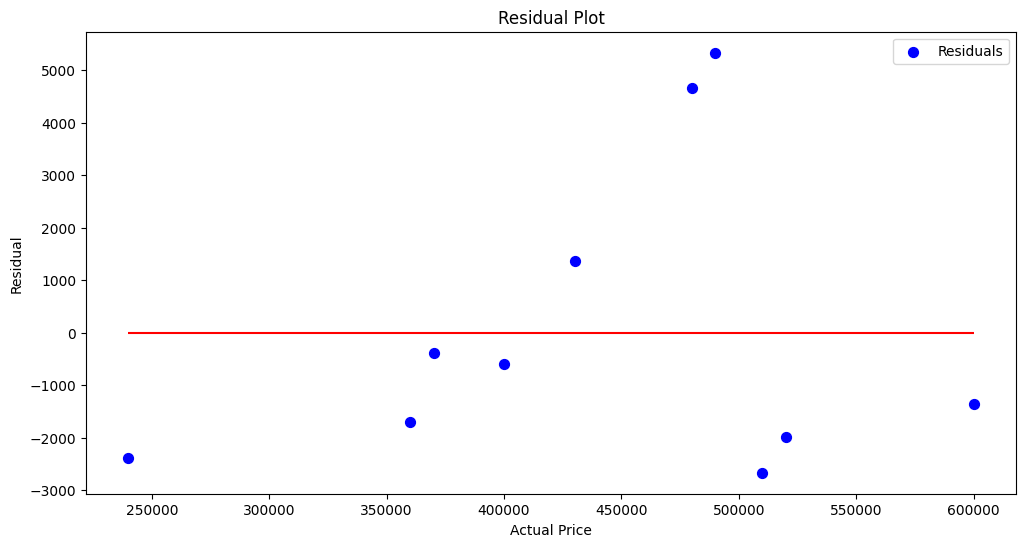

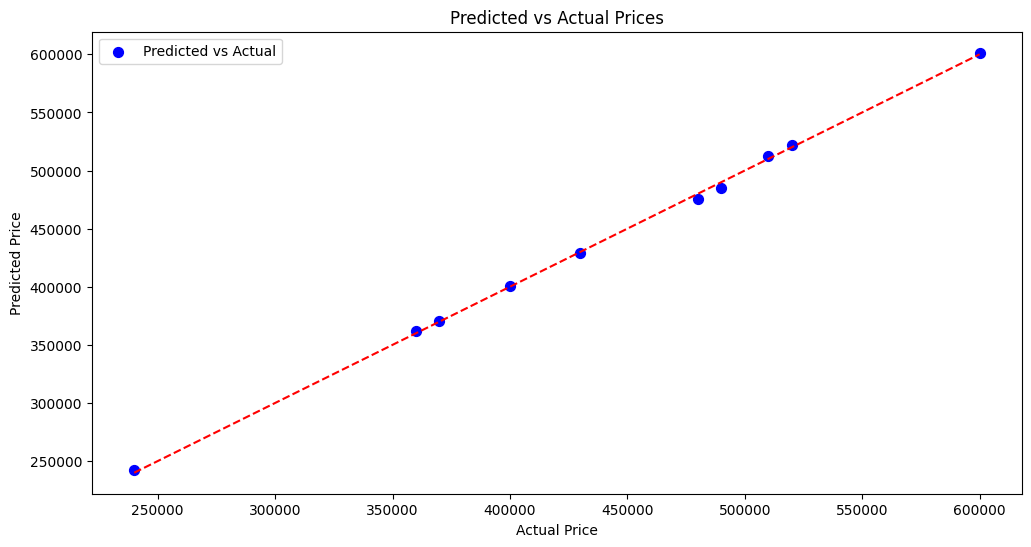

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create the dataset
data = pd.read_csv("house_price.csv")

# Define features (X) and target (y)
X = data.drop(["price"], axis = 1)
y = data["price"]

# Data Preprocessing
scaler = StandardScaler()
poly = PolynomialFeatures(degree=2, include_bias=False)

# Create a pipeline for linear regression with polynomial features and scaling
pipeline = make_pipeline(
    scaler,
    poly,
    LinearRegression()
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using cross-validation
cross_val_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validated R^2 Score: {cross_val_scores.mean()}")

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Print model coefficients (for Linear Regression inside the pipeline)
print("Model Coefficients: ", pipeline.named_steps['linearregression'].coef_)
print("Model Intercept: ", pipeline.named_steps['linearregression'].intercept_)

# Plot Residuals
plt.figure(figsize=(12, 6))
residual = y_test - y_pred
plt.scatter(y_test, residual, color='blue', s=50, label='Residuals')  # Residual = Actual Value - Predicted Value
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), color='red')
plt.xlabel('Actual Price')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.legend()
plt.show()

# Plot Predicted vs. Actual Prices
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='blue', s=50, label='Predicted vs Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.legend()
plt.show()


StandardScaler is used for scaling the data and putting all of it to standard and *similar* level to each other. Like here, bathrooms column has values like 1, 2, 3, etc. and price column has values in lakhs. Both of these types of values have a lot of gap between them. So, we bring them to a level standard to each other, to easily do calculations which can satisfy both columns.
Overall data is considered to be good when the graph it forms is of bell-shaped.

In simple terms, if you have data with different ranges, like heights in centimeters and weights in kilograms, StandardScaler transforms them to have similar scales. This makes the data easier to compare and helps some machine learning models work better and give high accuracy.

Each feature (columns) will have a mean of 0 and a standard deviation of 1.

StandardScaler is used for Feature Engineering.


Polynomial features in machine learning are new features created by taking existing features and raising them to a power (like squaring or cubing them). This helps models capture more complex relationships in the data, making them more flexible and accurate.

Example: If column X contains [1,2,3,4], and the task is that using X we have to predict column Y, that is [2,5,10,17]. This simply won't be able to predict it. So, using Polynomial Features we create more columns that are related to the current columns. Like here if we make a column X^2, that is, [1 , 4 , 9 , 16], we can now train the model on both X and X^2 to predict Y. This will give better outputs! Similarly we can make a column for X^3 (cube of X), and so on.

Purpose of the degree parameter is to specify the highest power (degree) to which the columns will be raised. Like if the degree is set to 2, then it will only create columns of 2 degree like X^2, X1*X2, X1^2, etc.

Pipeline: A convenient way to bundle preprocessing steps (StandardScaler, PolynomialFeatures) and the model (LinearRegression) into a single object. This ensures that all preprocessing steps are applied consistently during training and testing.

A ML project has many steps:
import data -> clean data -> feature engineering -> model training -> deployment.

Each step depends on the successful completion of the previous one. To manage this process efficiently, we create functions for each step. For example, after creating a function to clean the data (which might involve around 30 lines of code), we call this function in the feature engineering step, and after creating a function for what happens in the feature engineering step, we call it in the model training step, and so on.

This structured process forms a pipeline, where each step is executed in sequence, ensuring that the workflow is organized and that each step's output is ready for the next one.

This version highlights the process flow and the idea of a pipeline more clearly while keeping the content concise.

Making pipelines is helpful as it can help in debugging, code looks clean, easy to manage.

Points: Each point on the graph represents one house in your test dataset.
Horizontal Line at 0: This line represents where the residuals would be zero (i.e., perfect predictions).


Actual Price: The x-axis tells you the actual price of the house, which is slightly below 250,000 (e.g., 248,000).

Residual: The y-axis tells you the residual value, which in this case is slightly below -2,000 and closer to -2,500.

Actual Price: Let’s assume it's around 248,000.
Residual: If the residual is around -2,500, it means the model predicted the price to be 2,500 units more than the actual price.

Predicted Price=Actual Price−Residual
Predicted Price
=
248
,
000
−
(
−
2
,
500
)
=
248
,
000
+
2
,
500
=
250
,
500
Predicted Price=248,000−(−2,500)=248,000+2,500=250,500
So, the model predicted the house’s price to be approximately 250,500, but the actual price was around 248,000.

Zero Residual: The horizontal line at 0 corresponds to a residual value of 0. A residual of 0 means that the model's prediction was exactly equal to the actual value of the target variable.
Residual = Actual Value - Predicted Value = 0 ---> Actual Value = Predicted Value ---> Perfect prediction.

2nd graph: Ideal Scenario (Perfect Model):-

45 degree line (x = y):

This line represents a scenario where the predicted prices perfectly match the actual prices. If your model were perfect, all points would lie exactly on this line because:

Predicted Price = Actual Price